In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
len(df)

891

In [6]:
#Now we can drop the columns
df=df.drop("deck",axis=1)
df=df.drop("alive",axis=1)
df=df.drop("adult_male",axis=1)
df=df.drop("pclass",axis=1)
df=df.drop("who",axis=1)
df=df.drop("alone",axis=1)
df=df.drop("embarked",axis=1)
df=df.drop("embark_town",axis=1)


In [8]:
df.isnull().sum()

survived      0
sex           0
age         177
sibsp         0
parch         0
fare          0
class         0
dtype: int64

In [9]:
df.dropna(inplace=True)


In [10]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
class       0
dtype: int64

In [11]:
len(df)

714

In [12]:
df.head()


,survived,sex,age,sibsp,parch,fare,class
0,0,male,22.0,1,0,7.2500,Third
1,1,female,38.0,1,0,71.2833,First
2,1,female,26.0,0,0,7.9250,Third
3,1,female,35.0,1,0,53.1000,First
4,0,male,35.0,0,0,8.0500,Third


In [13]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [14]:
df.sex=df.sex.map({'male':0,'female':1})
df['class']=df['class'].map({'First':1,'Second':2,'Third':3})
df.head()

,survived,sex,age,sibsp,parch,fare,class
0,0,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,1,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,1
4,0,0,35.0,0,0,8.0500,3


<AxesSubplot:xlabel='sex', ylabel='survived'>

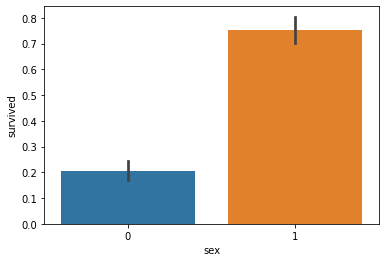

In [15]:
#Visualisation
sns.barplot(x = 'sex', y = 'survived', data = df)

<AxesSubplot:xlabel='sibsp', ylabel='survived'>

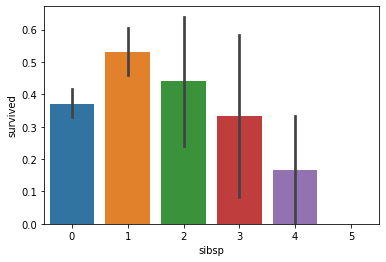

In [16]:
sns.barplot(x = 'sibsp', y = 'survived', data = df)

<AxesSubplot:xlabel='parch', ylabel='survived'>

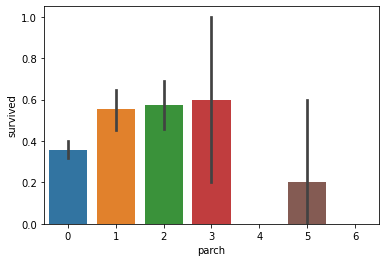

In [17]:
sns.barplot(x = 'parch', y = 'survived', data = df)

<AxesSubplot:xlabel='class', ylabel='survived'>

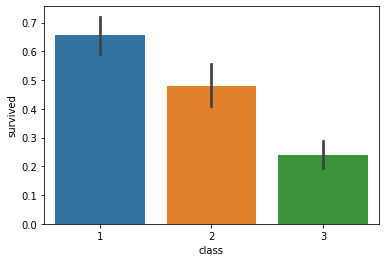

In [18]:
sns.barplot(x = 'class', y = 'survived', data = df)

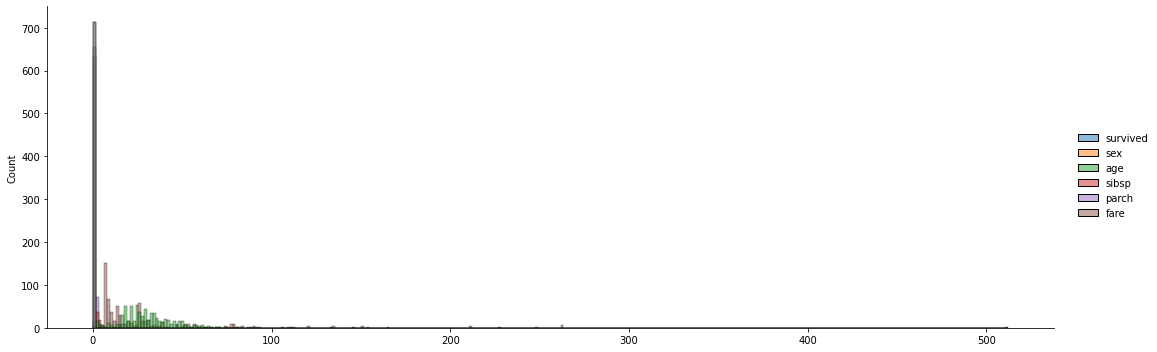

In [25]:
#Density Curve
sns.displot(df,aspect=3)

In [26]:
y=df['survived']
df=df.drop('survived',axis=1)
x=df

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
#Training the model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [29]:
logreg=LogisticRegression()

In [30]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [31]:
pred=logreg.predict(X_test)

In [32]:

#Classification Report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       142
           1       0.81      0.77      0.79        94

    accuracy                           0.83       236
   macro avg       0.83      0.82      0.83       236
weighted avg       0.83      0.83      0.83       236



In [33]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[125  17]
 [ 22  72]]


In [34]:
accuracy_score(y_test,pred)

0.8347457627118644